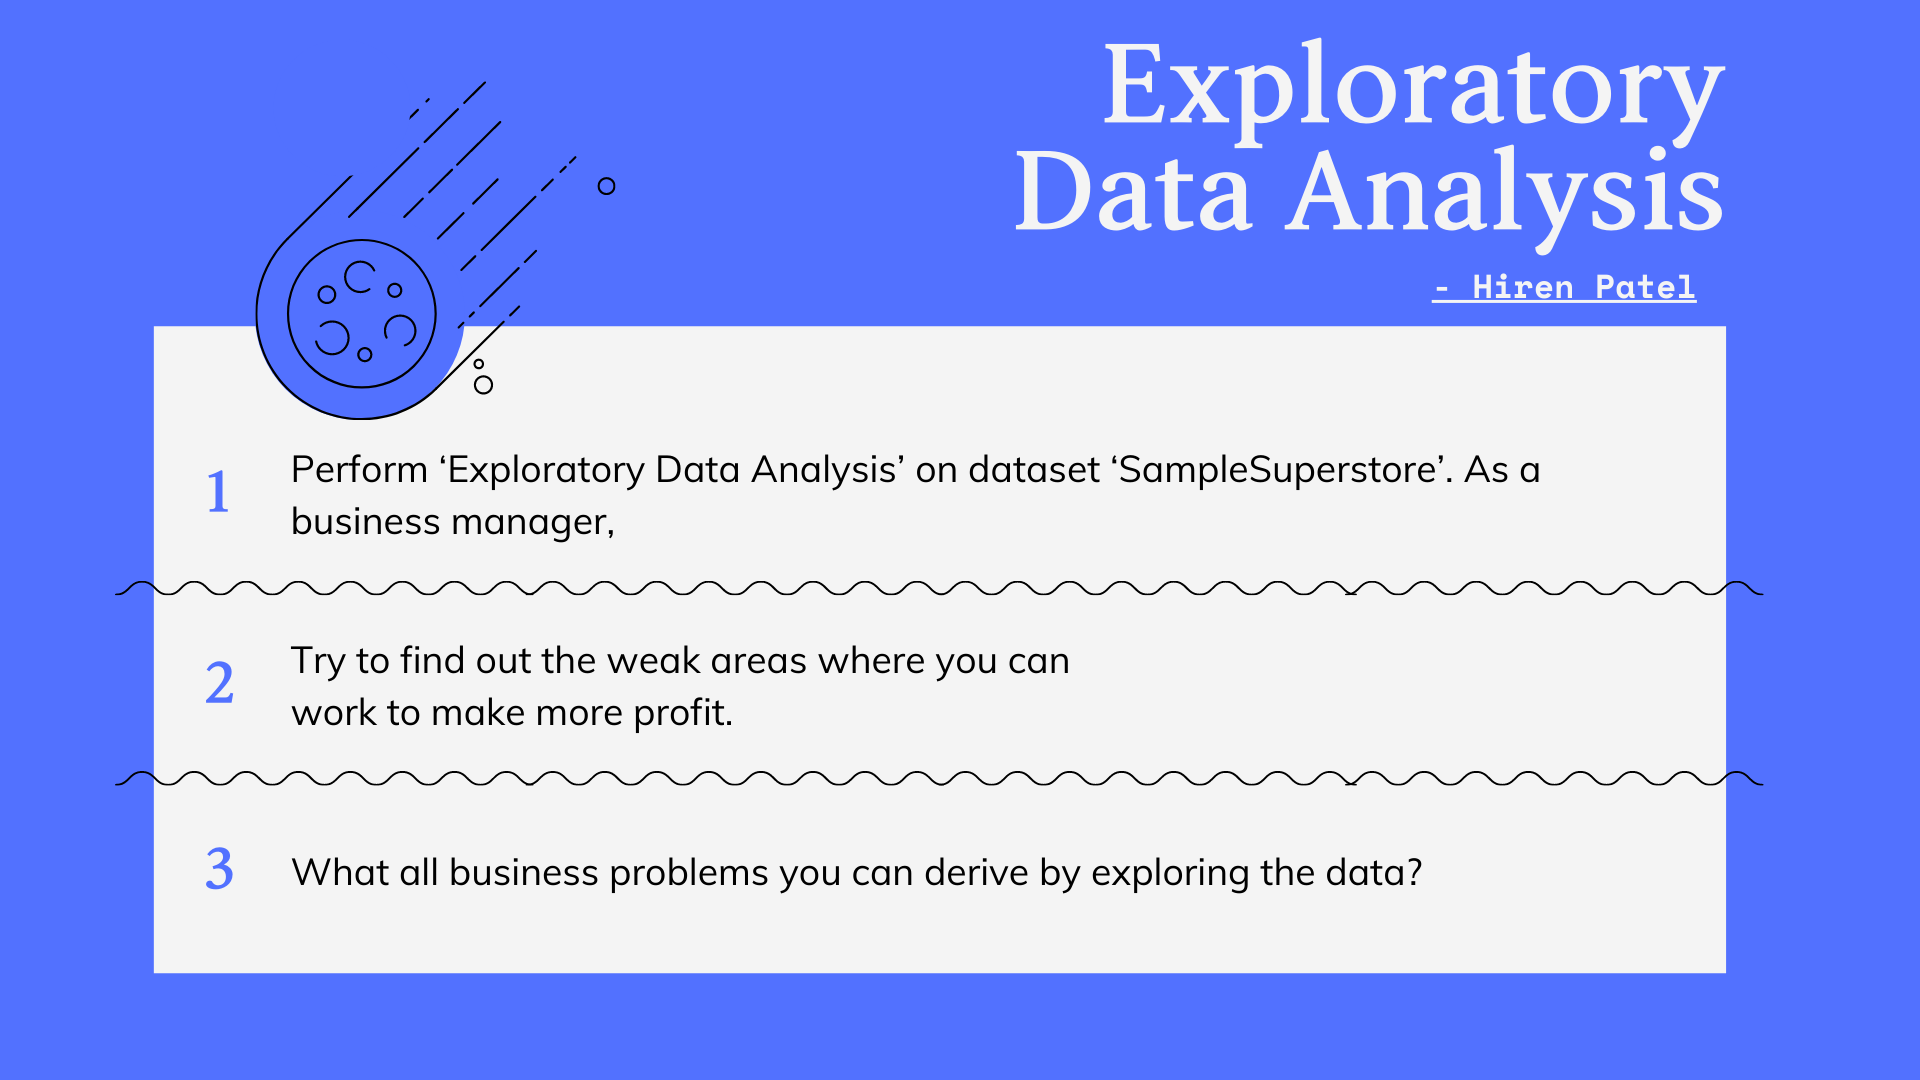

In [2]:
from IPython.display import Image 

Image("Task 3 EDA on Sample Store.png")

##### Import required libraries

In [4]:
##for data handling and manipulation 
import numpy as np
import pandas as pd

In [5]:
## For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
## loading the data in to data variable.
## pd is an instance of pandas, and from pandas I used read_csv() to read the data
## sample.csv is a dataset which is in csv file (Comma seperated values)
data = pd.read_csv('sample.csv')

In [8]:
## Checking dataset head
## head function returns first n rows from the dataset.
##suppose if we want to retrive first 10 rows from the dataset we must use head(10)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
## shape function returns tuple value
## it is give us dimensionality of the given DataFrame.
## here data is our actual dataset which we have imported
data.shape

(9994, 13)

In [10]:
## dtypes returns data types from given dataset
## it will return series which is representing data types of columns
## if the datatypes are mixed it will stored as object dtype

data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [11]:
## describe is used to examine some basic statistical details such as mean, minimum, std deviation, maximum
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [12]:
## here we can see the maximum sales is 22638 and minimum sales is 0
## maximum quantity is sold 14 and min 1
## highest profit 8400 and loss is 6599

In [13]:
## columns returns the labels of the dataframe
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [14]:
##nunique returns distinct values from the given dataset
data.nunique()
## ship mode has a 4 different observations
## There is only one country inside the country column
## Total 531 cities, 49 states and much more we can evaluate here.

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [15]:
## humm, Let's check the what are the shipping mode we have
data['Ship Mode'].unique() ## There are 4 class shipping modes available in the col name Ship Mode

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [16]:
## as well as let's check regions.
data['Region'].unique() ## 4 regions of US country

array(['South', 'West', 'Central', 'East'], dtype=object)

In [17]:
data['Discount'].unique() #discount they have given

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [18]:
data['Sub-Category'].unique() 

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [19]:
data['State'].unique() ## Total States

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [20]:
print(data.groupby('State').sum().loc['California'])
print('-'*50)
print(data.groupby('State').sum().loc['Florida'])
print('-'*50)
print(data.groupby('State').sum().loc['Texas'])

Postal Code    1.843826e+08
Sales          4.576876e+05
Quantity       7.667000e+03
Discount       1.456000e+02
Profit         7.638139e+04
Name: California, dtype: float64
--------------------------------------------------
Postal Code    1.264022e+07
Sales          8.947371e+04
Quantity       1.379000e+03
Discount       1.146500e+02
Profit        -3.399302e+03
Name: Florida, dtype: float64
--------------------------------------------------
Postal Code    7.574769e+07
Sales          1.701880e+05
Quantity       3.724000e+03
Discount       3.646400e+02
Profit        -2.572936e+04
Name: Texas, dtype: float64


In [21]:
## cleaning the data

In [22]:
data.isnull().sum() ##looks like there is no null value

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [23]:
## to analyse duplicate values 
data.duplicated().sum()

17

In [24]:
data[data.duplicated()== True]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [25]:
## Dropping duplicate values
data.drop_duplicates(keep= 'first', inplace= True)

In [26]:
## returns counts of unique values
data.Category.value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [27]:
data.Country.value_counts() ## since we have only one country so we can drop this column

United States    9977
Name: Country, dtype: int64

In [28]:
data.drop('Country', axis=1, inplace= True)

In [29]:
## corr() is used to find the pairwise correlation of all columns in the dataframe. 
## Any NA values are automatically excluded.
## For any non-numeric data type columns in the dataframe it is ignored.
corn = data.corr()
corn

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


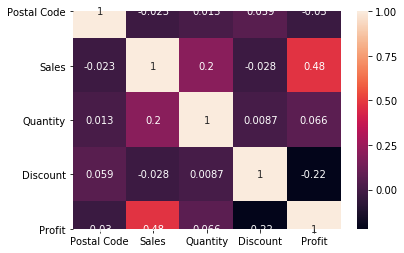

In [30]:
sns.heatmap(corn, annot= True)
plt.show()

In [28]:
data.drop(['Postal Code'], axis=1, inplace= True)

In [30]:
data.drop(['Country'], axis=1, inplace= True )

In [31]:
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


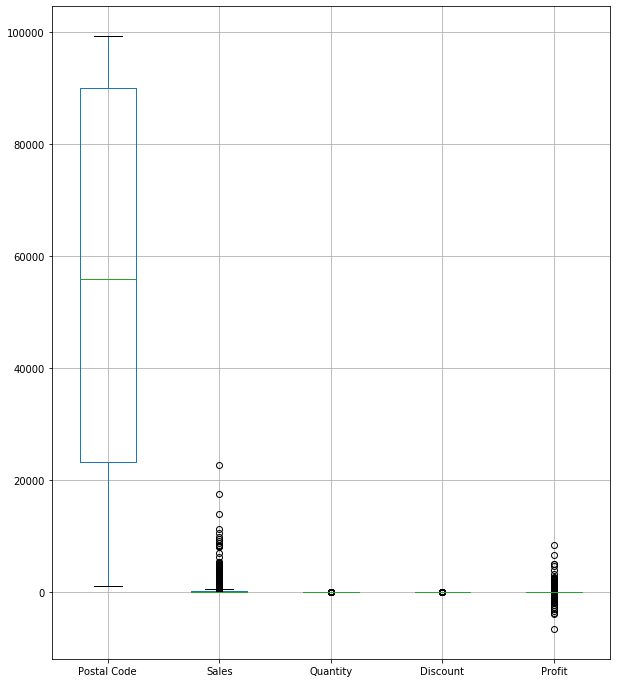

In [32]:
data.boxplot(figsize=(10,12))
plt.show()

In [33]:
## interquartile range 
data_iqr = data
Qua1 = data_iqr.quantile(0.25)
Qua3 = data_iqr.quantile(0.75)
IQR = Qua3 - Qua1
print(IQR)

Postal Code    66785.0000
Sales            192.6700
Quantity           3.0000
Discount           0.2000
Profit            27.6458
dtype: float64


In [34]:
data_outlier = data_iqr[~((data_iqr < (Qua1 - 1.5 * IQR)) |(data_iqr > (Qua3 + 1.5 * IQR))).any(axis=1)]

print("All rows before outlier filtering: ", data_iqr.shape)
print("All rows after outlier filtering: ", data_outlier.shape)

All rows before outlier filtering:  (9977, 12)
All rows after outlier filtering:  (7127, 12)


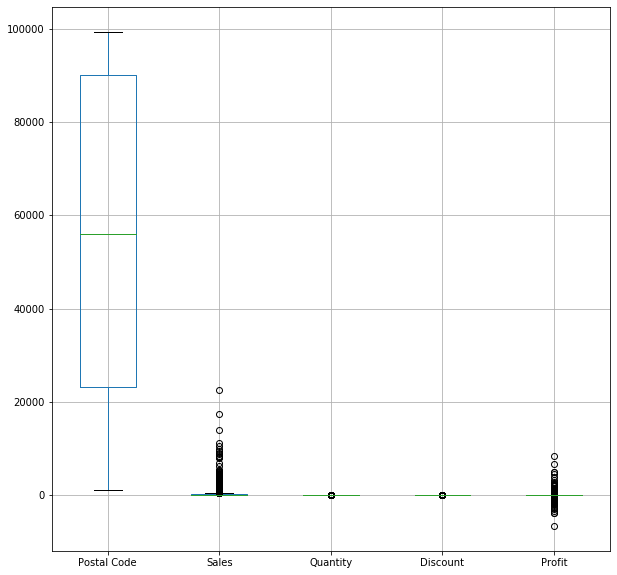

In [35]:
data.boxplot(figsize=(10,10) )
plt.show()

In [36]:
data_outlier.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.0,41.9136
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7,0.0,14.1694
6,Standard Class,Consumer,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4,0.0,1.9656


In [37]:
data_outlier.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,7127.000000,7127.000000,7127.000000,7127.000000,7127.000000
mean,55543.612039,75.736720,3.407745,0.096805,13.008233
std,32797.306553,92.175172,1.880857,0.106368,17.200106
min,1040.000000,0.990000,1.000000,0.000000,-39.637000
25%,22204.000000,15.552000,2.000000,0.000000,3.239200
50%,55407.000000,37.880000,3.000000,0.000000,8.299200
75%,90036.000000,98.426000,5.000000,0.200000,19.627650
max,99301.000000,496.860000,9.000000,0.500000,70.722000


<Figure size 600x400 with 0 Axes>

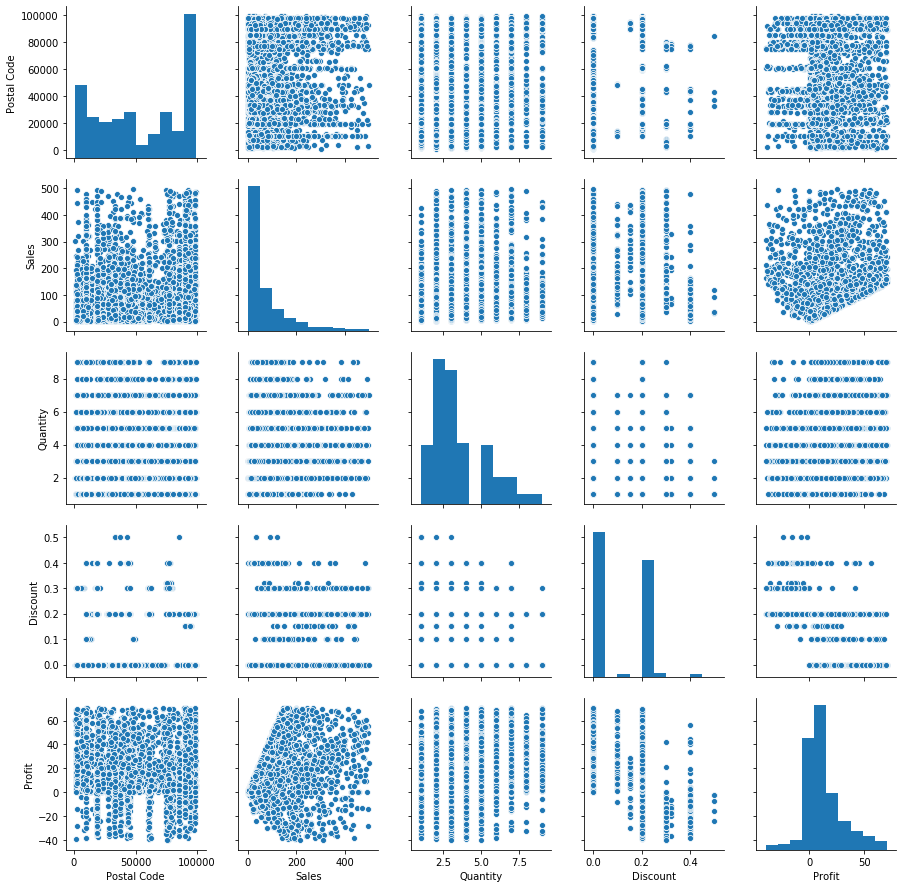

In [38]:
plt.figure(dpi=100)
sns.pairplot(data_outlier)
plt.show()

In [66]:
city_sales = data_outlier.groupby(['City'])['Sales'].mean().sort_values(ascending=False)
print('Top 10 most selling cities: {city_ten} and least selling cities {lea_city}'.format(city_ten = city_sales.head(10),lea_city = city_sales.tail() )) ##Highest selling city: Whittier


Top 10 most selling cities: City
Whittier       444.768000
El Cajon       432.808000
Des Plaines    403.978000
Orland Park    339.960000
Redding        333.576000
Hesperia       320.550500
Longmont       305.029333
San Gabriel    303.250000
Holyoke        301.960000
Conway         301.960000
Name: Sales, dtype: float64 and least selling cities City
Layton             4.960
Greenwood          4.410
Springdale         4.300
San Luis Obispo    3.620
Jupiter            2.064
Name: Sales, dtype: float64


In [67]:
city_discount = data_outlier.groupby(['City'])['Discount'].mean().sort_values(ascending=False)
city_discount.head(10) ##highest discount given in city: Medina
print('Top 10 most discount given in cities: {city_ten} and least selling cities {lea_city}'.format(city_ten = city_discount.head(10),lea_city = city_discount.tail() ))

Top 10 most discount given in cities: City
Medina         0.320000
San Angelo     0.300000
Pharr          0.300000
Texas City     0.300000
York           0.250000
Des Plaines    0.250000
Chester        0.245455
Brownsville    0.244000
Hialeah        0.240000
Chattanooga    0.237500
Name: Discount, dtype: float64 and least selling cities City
Malden         0.0
Manchester     0.0
Manhattan      0.0
Maple Grove    0.0
Aberdeen       0.0
Name: Discount, dtype: float64


In [53]:
city_profit = data_outlier.groupby(['City'])['Profit'].mean().sort_values(ascending=False)
print(city_profit.head(10)) ##most profitable city is Orland Park
print(city_profit['Orland Park'])

City
Orland Park       67.9920
Beverly           66.6272
Mishawaka         64.2000
San Gabriel       63.6825
Pico Rivera       62.7370
Holyoke           60.3920
Jamestown         57.5928
Coon Rapids       57.5016
Chula Vista       55.9120
Citrus Heights    54.3438
Name: Profit, dtype: float64
67.992


In [70]:
city_disc = data_outlier.groupby(['City'])['Discount'].mean().sort_values(ascending = False)
print(city_disc.head())
print('-'*50)
print('Discount given in Orland Park city {city_discount} and profit {city_pro}:'.format(city_discount = city_disc['Orland Park'],city_pro = city_profit['Orland Park']) )
print('-'*50)
print('Discount given in Whittier City {city_discount} and profit {city_pro} '.format(city_discount = city_disc['Whittier'], city_pro = city_profit['Whittier']))
print('-'*50)
print('Discount given in Beverly City {city_discount} and profit {city_pro} '.format(city_discount = city_disc['Beverly'], city_pro = city_profit['Beverly']))
print('-'*50)
print('Discount given in Mishawaka City {city_discount} and profit {city_pro} '.format(city_discount = city_disc['Mishawaka'], city_pro = city_profit['Mishawaka']))

City
Medina        0.32
San Angelo    0.30
Pharr         0.30
Texas City    0.30
York          0.25
Name: Discount, dtype: float64
--------------------------------------------------
Discount given in Orland Park city 0.2 and profit 67.992:
--------------------------------------------------
Discount given in Whittier City 0.2 and profit 44.4768 
--------------------------------------------------
Discount given in Beverly City 0.0 and profit 66.6272 
--------------------------------------------------
Discount given in Mishawaka City 0.0 and profit 64.2 


In [42]:
## as we can see above highest selling city is 'Whittier' and highest profit is in the city 'Orland Park'

In [43]:
# this should be note down

In [44]:
## Lets check this with statewise

In [72]:
state_dis = data_outlier.groupby(['State'])['Discount'].mean().sort_values(ascending=False)
print('Most statewise given discount{st_dis} and least discount given {le_dis} :'.format(st_dis = state_dis.head(10),le_dis = state_dis.tail()))

Most statewise given discountState
Pennsylvania      0.224119
Ohio              0.221967
Texas             0.211115
Illinois          0.209274
Tennessee         0.205185
Florida           0.202317
Arizona           0.202000
North Carolina    0.201170
Oregon            0.200000
Colorado          0.200000
Name: Discount, dtype: float64 and least discount given State
South Carolina    0.0
South Dakota      0.0
Vermont           0.0
Virginia          0.0
Alabama           0.0
Name: Discount, dtype: float64 :


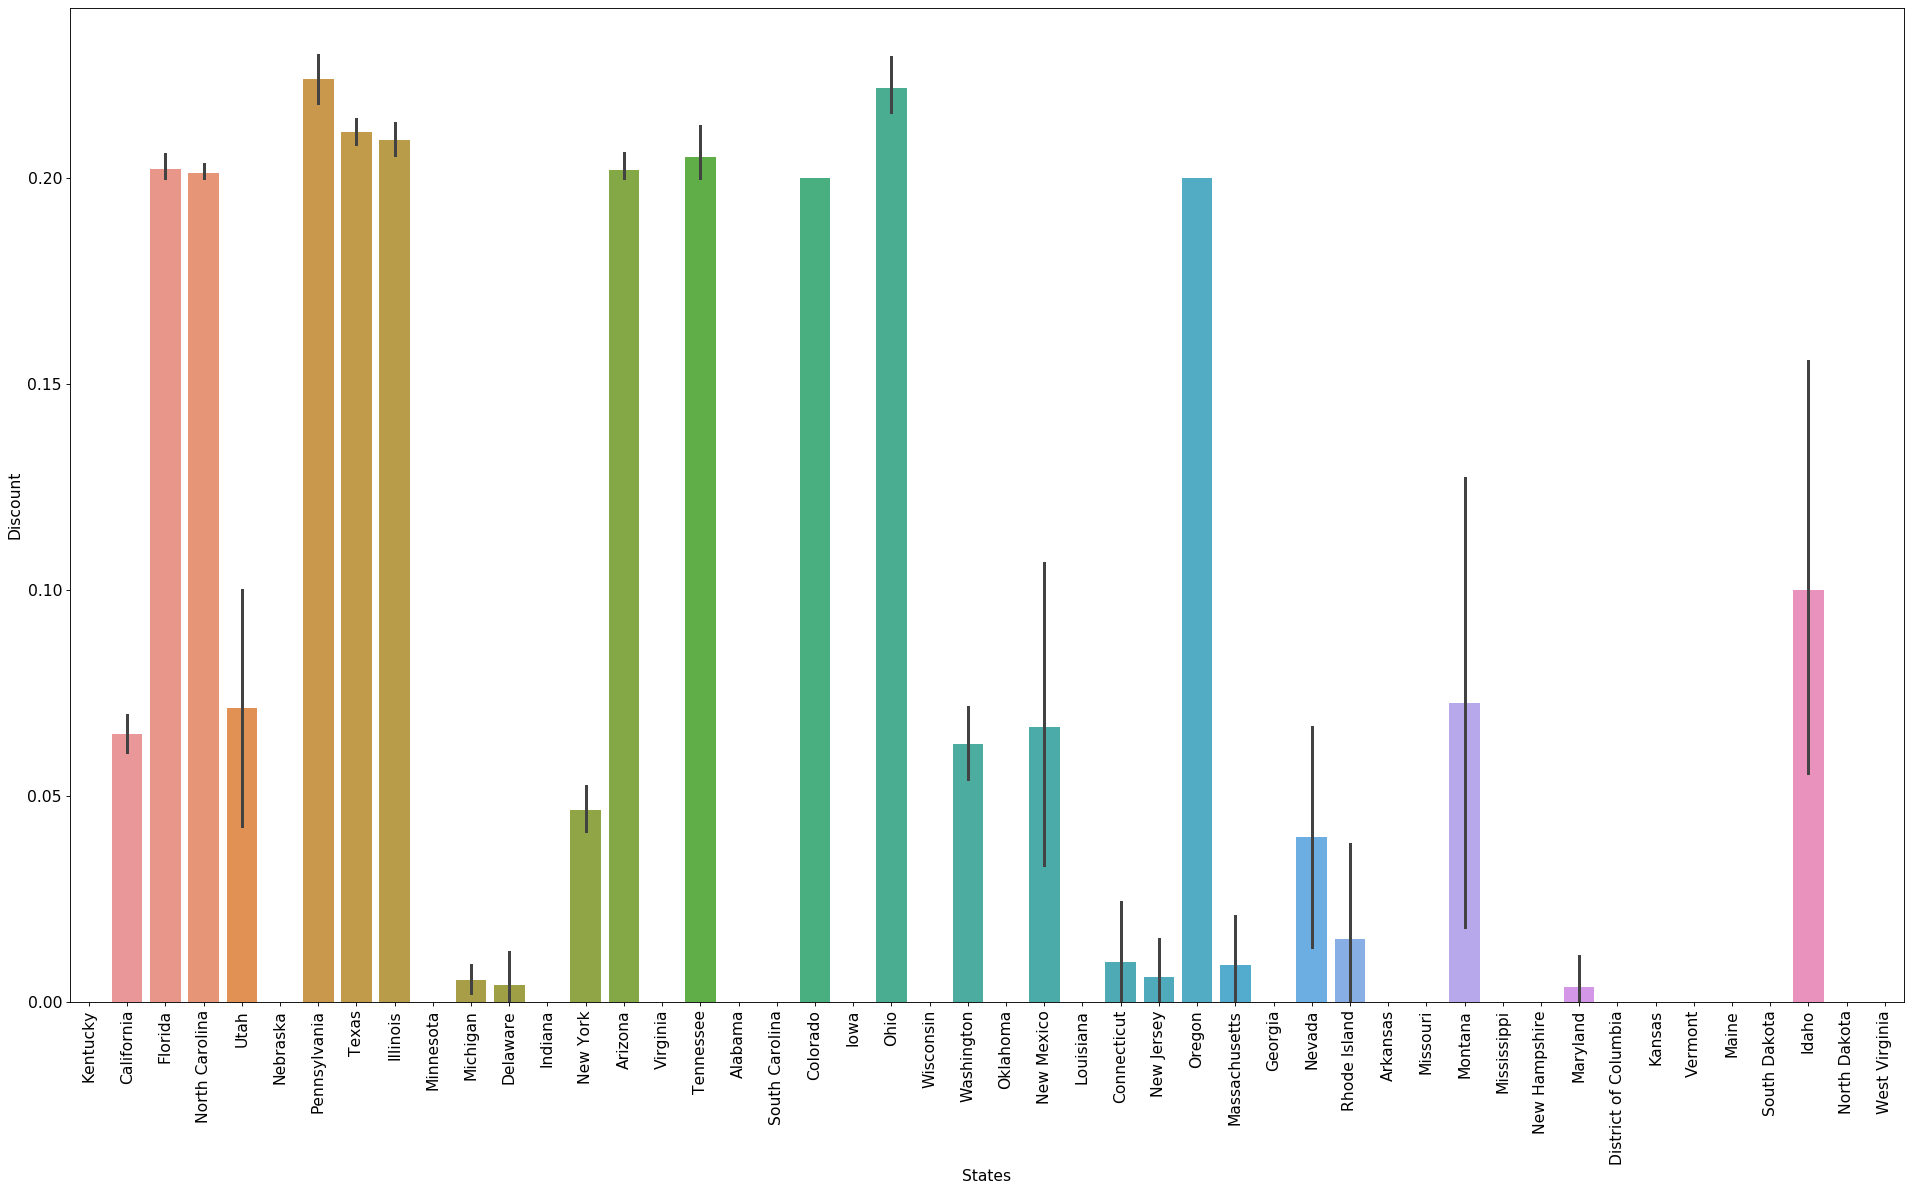

In [46]:
plt.figure(figsize=(24,15), dpi=80)
sns.barplot(x = 'State', y = 'Discount', data= data_outlier)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('States', fontsize= 14)
plt.ylabel('Discount', fontsize=14)
plt.tight_layout()
plt.show()

In [48]:
state_profit = data_outlier.groupby(['State'])['Profit'].mean().sort_values(ascending = False)
state_profit.head(10)

State
Vermont          26.279617
New Hampshire    25.935671
Nevada           24.192230
West Virginia    21.716800
Maryland         20.975454
Michigan         20.523012
Arkansas         20.169518
Oklahoma         19.921773
Virginia         19.761675
Missouri         19.653261
Name: Profit, dtype: float64

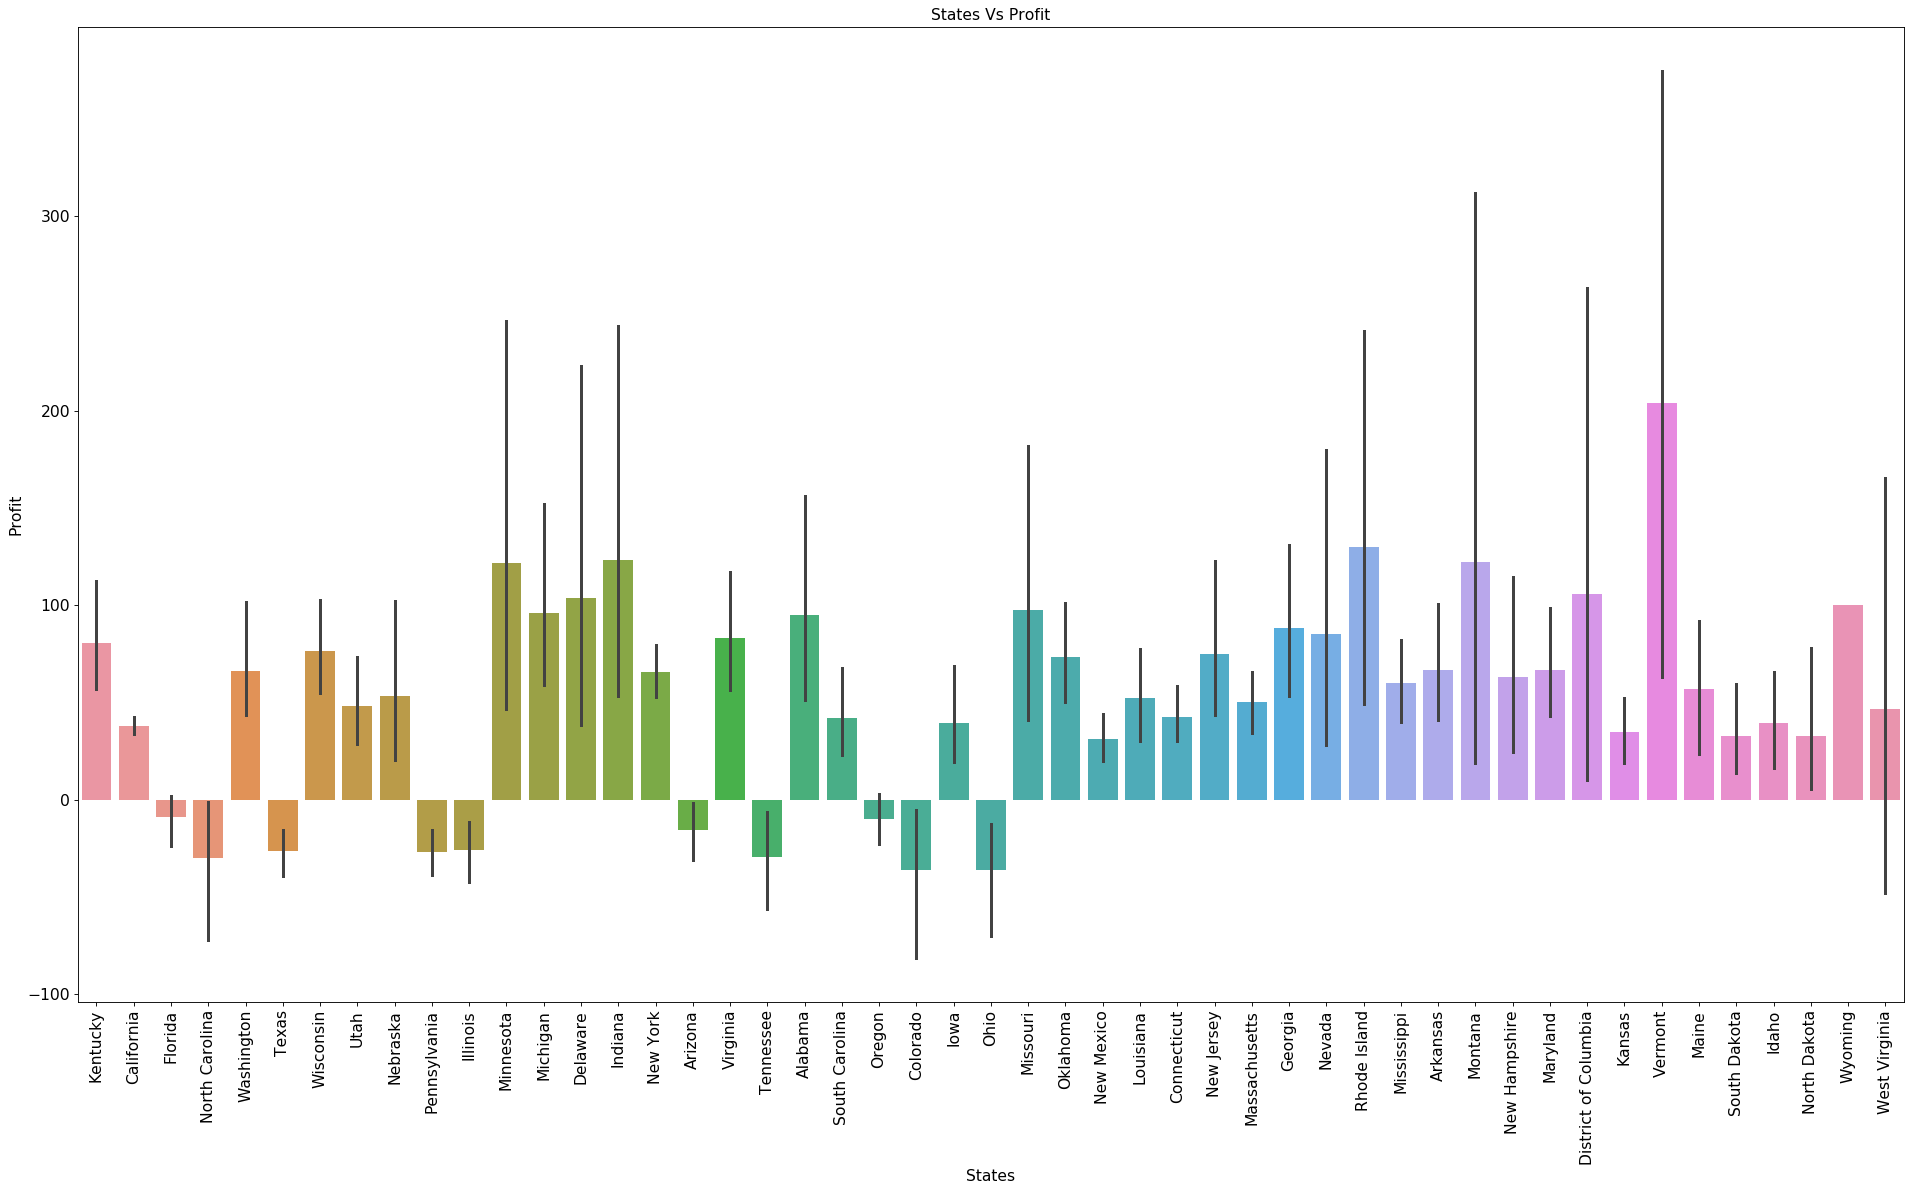

In [49]:
plt.figure(figsize=(24,15), dpi=80)
sns.barplot(x = 'State', y = 'Profit', data= data)
plt.xticks(rotation = 90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('States', fontsize= 14)
plt.ylabel('Profit', fontsize=14)
plt.title('States Vs Profit', fontsize = 14)
plt.tight_layout()
plt.show()

In [50]:
##region wise profit

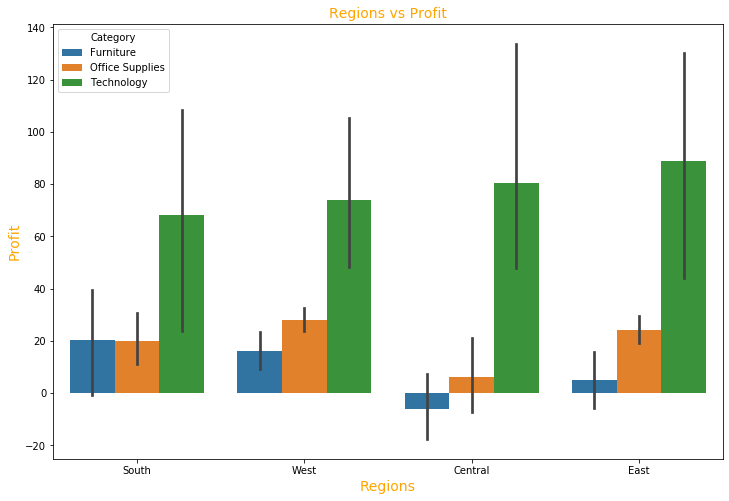

In [86]:
plt.figure(figsize = [12,8])
sns.barplot(x = "Region", y = "Profit", hue = "Category", data = data)
plt.xlabel('Regions', fontsize = 14, color = 'Orange')
plt.ylabel('Profit', fontsize = 14, color = 'Orange')
plt.title('Regions vs Profit', fontsize =14,color = 'Orange')
##plt.savefig('Regions vs Profit.jpg')
plt.show() 
##as we can see, We attain highest profit in Technology segment in all region
## We experienced loss or lowest profit in central zone and east zone of USA in Furniture category.
## Office Supplies is less profitable in central zone. 

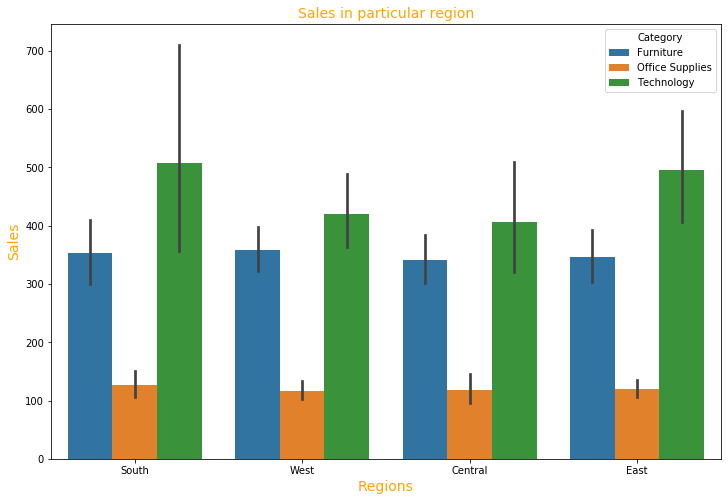

In [84]:
plt.figure(figsize = (12,8))
sns.barplot(x = "Region", y = "Sales", hue = "Category", data = data)
plt.xlabel('Regions', fontsize = 14, color = 'Orange')
plt.ylabel('Sales',fontsize = 14, color = 'Orange')
plt.title('Sales in particular region',fontsize = 14, color = 'Orange')
##plt.savefig('Region vs Sales.jpg')
plt.show()

## sales of furniture category remain constant in all zone but as we see above profit is less
## sales of office supplies constant. less sale hence less profit

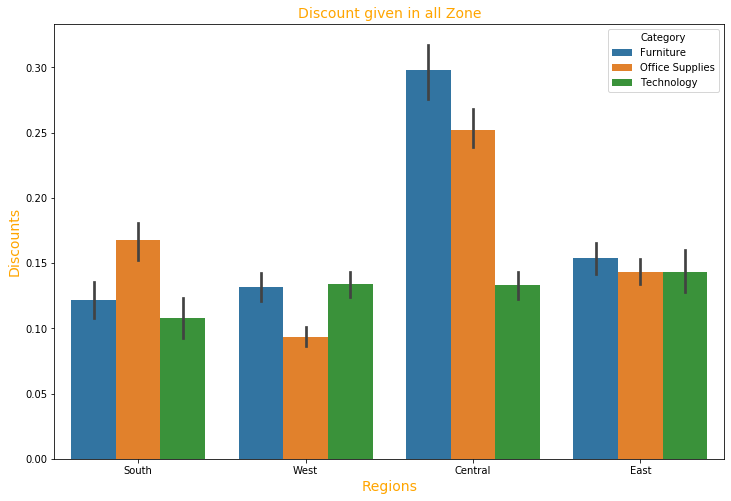

In [83]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Region', y = 'Discount', hue='Category', data = data)
plt.title('Discount given in all Zone', fontsize = 14, color = 'Orange')
plt.xlabel('Regions', fontsize= 14, color = 'Orange')
plt.ylabel('Discounts', fontsize= 14,color = 'Orange')
## plt.savefig('Regions vs Discounts.jpg')
plt.show()

## from the barplot below, we understand that discount given in furniture category is way higher than other category
## This might be a case that due to heavy discount on furniture category we face the loss.

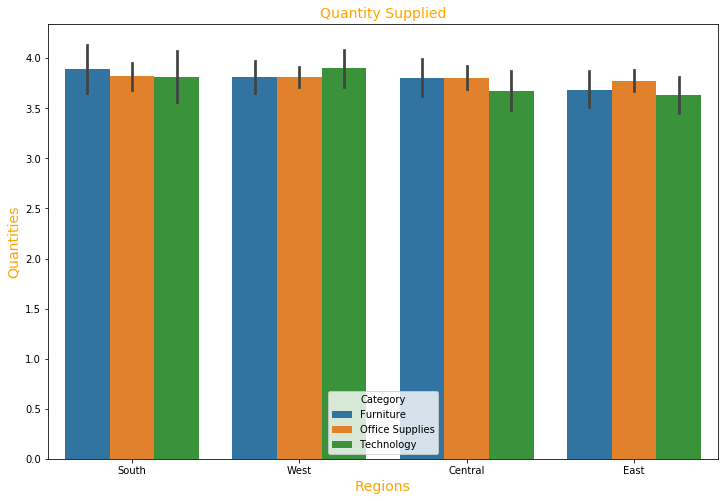

In [82]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Region', y = 'Quantity', hue='Category', data = data)
plt.title('Quantity Supplied', fontsize = 14, color = 'Orange')
plt.xlabel('Regions', fontsize= 14, color = 'Orange')
plt.ylabel('Quantities', fontsize= 14,color = 'Orange')
##plt.savefig('Region vs quantities.jpg')
plt.show()

### Conclusion

1. Supplied quantity is the same.. such as furniture supply, office supply, and Technology supply are the same in all region.
2. As we can see Quantities in all regions supplied equally.
3. We have attain highest profit in Technology segment in all region.
4. We experienced loss or lowest profit in central zone and east zone of USA in Furniture category.
5. Office Supplies is less profitable in central zone.
6. We may decrease the discount rates in the furniture category. or else we can discontinue the            discount and reduce the selling price to gain more profit.
7. And, talking about city we can see that some cities has the highest selling without any discount. we    can correct the dicount percentage in some area to attain more profit.
